## Ads Optimization using the Upper Confidence Bound Algorithm

In [1]:
# import essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# load dataset

source = '../../Ads_CTR_Optimisation.csv'
dataset = pd.read_csv(source)

In [15]:
# Check top 4 role of the dataset 

dataset.head(4)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0


In [17]:
# cheching the number of roles

dataset.shape

(10000, 10)

In [18]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
# inplementing the upper confidence bound algorithm

import math

# N is number of time ad is shown
# d is number of ads altogether

N = 10000
d = 10

ads_selected = []
numbers_of_selections = [0] * d  # initiate lists with zeros
sums_of_rewards = [0] * d   # initiate lists with zeros
total_reward = 0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward= total_reward + reward
            
    

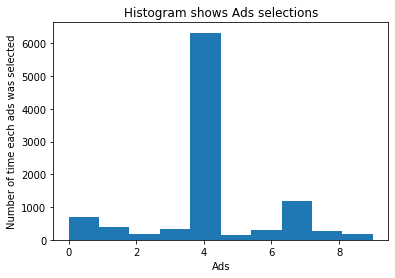

In [31]:
plt.hist(ads_selected)
plt.title('Histogram shows Ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of time each ads was selected')
plt.show()